In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


In [4]:
df = pd.read_csv("/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv")

In [14]:
from sklearn.model_selection import train_test_split

# split data
train, test = train_test_split(df, test_size=.25)

In [48]:
from sklearn.linear_model import LinearRegression

# data
years_experience = train['YearsExperience'].to_numpy() # []
salary = train['Salary'].to_numpy() # []

# reshape 
years_experience = years_experience.reshape(-1, 1) # [] []
salary = salary.reshape(-1, 1)

# model 
# y = mx + b
model = LinearRegression()
model.fit(years_experience, salary)

# test x input values
test_x = test['YearsExperience'].to_numpy().reshape(-1,1)
test_y = test['Salary'].to_numpy().reshape(-1,1)

# test model
y_output = model.predict(test_x)

print("Years Experience: ")
print(x_input)

print("Salary True: ")
print(test_y)


print("Salary Predicted: ")
print(y_output)
    

Years Experience: 
[[ 8.7]
 [ 3.2]
 [ 3.7]
 [ 4.5]
 [10.5]
 [ 7.9]
 [ 4.1]
 [ 9.5]]
Salary True: 
[[109431.]
 [ 64445.]
 [ 57189.]
 [ 61111.]
 [121872.]
 [101302.]
 [ 57081.]
 [116969.]]
Salary Predicted: 
[[108539.53475177]
 [ 56405.30520404]
 [ 61144.78061747]
 [ 68727.94127896]
 [125601.64624012]
 [100956.37409028]
 [ 64936.36094821]
 [116122.69541326]]


In [47]:
# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ",mean_absolute_error(test['Salary'], y_output))
print("Mean Squared Error: ",mean_squared_error(test['Salary'], y_output))
print("R-Squared: ",r2_score(test['Salary'], y_output))


Mean Absolute Error:  4160.102453176336
Mean Squared Error:  26943755.358471926
R-Squared:  0.9627028295698411


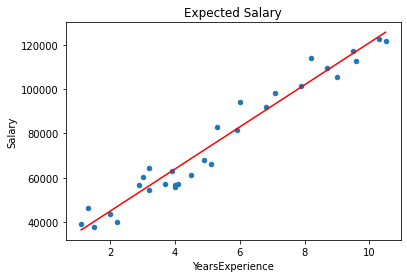

In [44]:
from matplotlib import pyplot as plt

# PLOT DATA
df = df.apply(pd.to_numeric, errors="coerce")
df.plot.scatter(x='YearsExperience', y='Salary', title='Expected Salary')

# PLOT THE MODEL LINE
m = model.coef_[0]
b = model.intercept_

# CALC Y
def predict(x, m, b):
    return m * x + b

# PLOT REGRESSION LINE
plt.plot(df['YearsExperience'], predict(df['YearsExperience'], m, b), '-r')

plt.show()